<a href="https://colab.research.google.com/github/ayushk1122/CSCI4170/blob/main/CSCI470_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Definition
The machine learning problem I wish to solve using logistic regression is predicting whether a wine is of high quality or not based on its chemical properties. The goal is to classify wines as either high quality (label = 1) or low quality (label = 0).

Dataset
We will use the Wine Quality Dataset from the UCI Machine Learning Repository. This dataset contains 11 chemical properties of wines and a quality score ranging from 0 to 10.
Link to dataset: [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)

To frame this as a binary classification problem:

High Quality (label = 1): Quality score ≥ 7
Low Quality (label = 0): Quality score < 7

Loading and Preparing Dataset



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, delimiter=';')

# convert quality to binary labels
data['quality'] = (data['quality'] >= 7).astype(int)

# split features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset loaded and prepared successfully!")
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Dataset loaded and prepared successfully!
Training set size: (3918, 11), Test set size: (980, 11)


Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier. Additionally, do the following:
• Visualize the decision tree structure for at least three different parameter settings.


Comment on how the depth and complexity change the tree: The depth and complexity of a decision tree significantly influence its behavior and performance. A fully grown default tree, with no restrictions on depth, tends to be very deep and highly complex. It risks overfitting by "memorizing" the data rather than generalizing, leading to poor performance on unseen data. In contrast, a shallow tree with a restricted depth (e.g., max_depth=3) simplifies the model, reducing the risk of overfitting. However, it may underfit the data as it cannot capture complex patterns, potentially misclassifying samples that require deeper splits. A moderately deep tree (e.g., max_depth=10 with criterion='entropy') has more balance by allowing the model to explore more detailed patterns while maintaining some constraints to prevent overfitting. Overall, as the depth increases, the tree's complexity grows, enabling it to reduce bias but increasing variance.

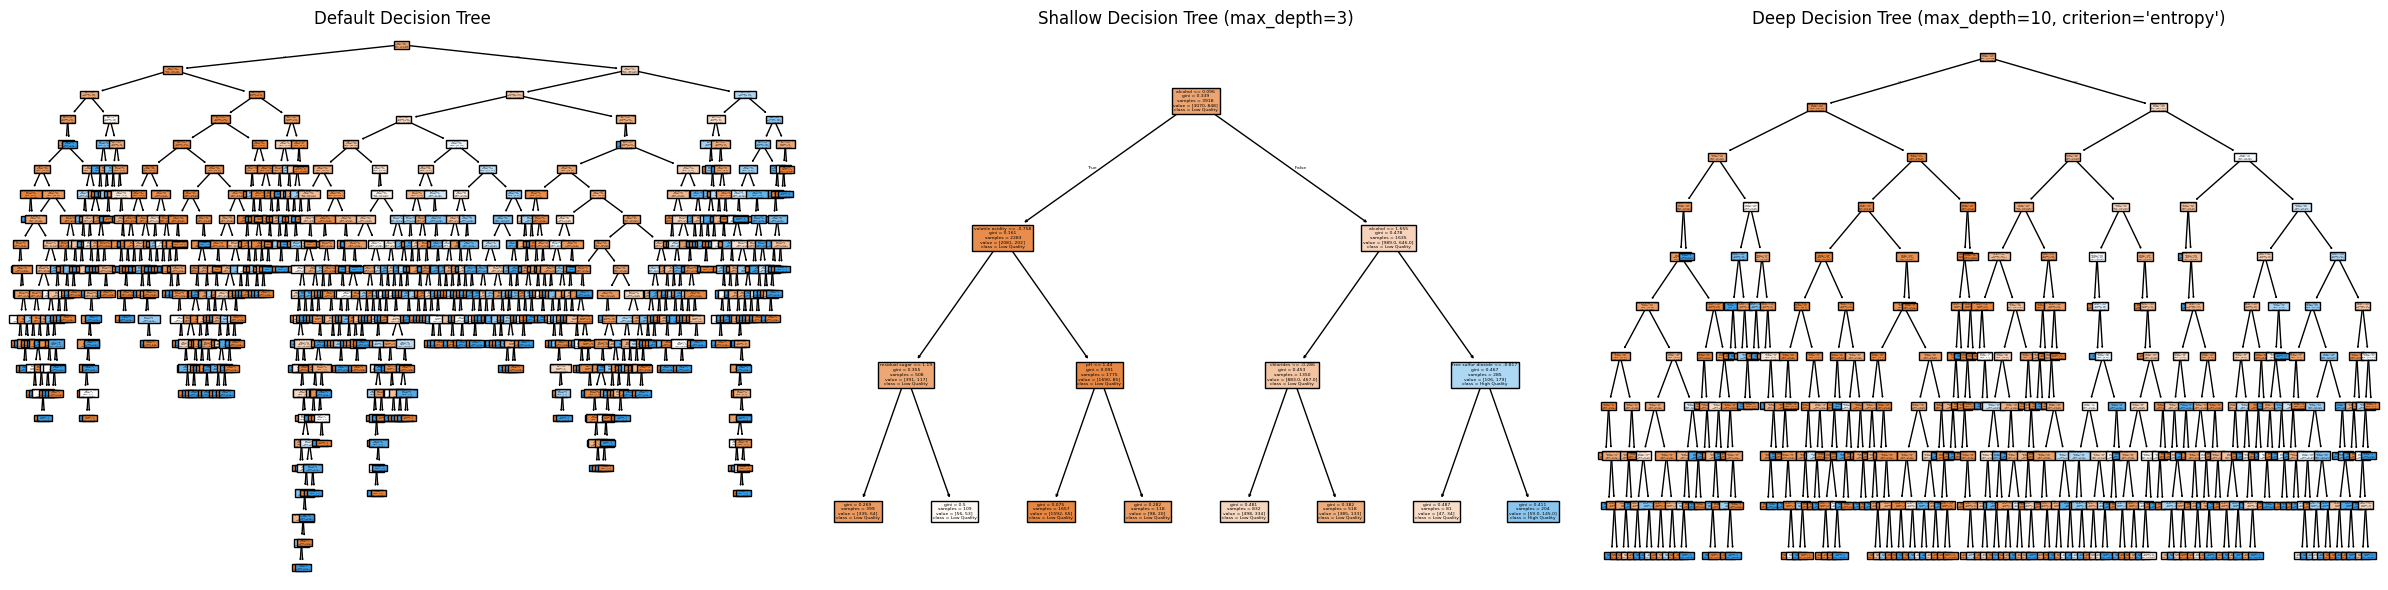

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# train Decision Tree Classifier with default parameters
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

# train with a shallow depth
clf_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_shallow.fit(X_train, y_train)

# train with a deeper tree and different splitting criterion
clf_deep_entropy = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
clf_deep_entropy.fit(X_train, y_train)

# visualize the trees
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# default tree
plot_tree(clf_default, filled=True, ax=axes[0], feature_names=X.columns, class_names=['Low Quality', 'High Quality'])
axes[0].set_title("Default Decision Tree")

# shallow tree
plot_tree(clf_shallow, filled=True, ax=axes[1], feature_names=X.columns, class_names=['Low Quality', 'High Quality'])
axes[1].set_title("Shallow Decision Tree (max_depth=3)")

# deep tree with entropy
plot_tree(clf_deep_entropy, filled=True, ax=axes[2], feature_names=X.columns, class_names=['Low Quality', 'High Quality'])
axes[2].set_title("Deep Decision Tree (max_depth=10, criterion='entropy')")

plt.tight_layout()
plt.show()


• Do some research on what sensitivity analysis is and how it is performed (include
citations). Perform a sensitivity analysis to measure the impact of at least two input
features on your model's decision boundary.


Sensitivity analysis is a method used to determine how changes in the input features of a model influence its output. In the context of machine learning, it helps measure the importance of input features by evaluating their impact on the model's predictions. This analysis identifies features that are most critical to the decision boundary and provides insights into the model’s robustness and reliability.


1.   Perturbation Method: Introduce small changes (perturbations) to one feature at a time and observe the change in model predictions.
2.   Permutation Importance: Randomly shuffle the values of a specific feature and measure the decrease in the model's accuracy. Larger decreases indicate a greater importance of the feature.
3. Partial Dependence Plots: Visualize the relationship between a feature and the predicted output while marginalizing over other features.
4. Feature Importances from Decision Trees: Use the built-in importance scores of decision trees, which measure how much each feature reduces impurity across all splits in the tree.

Citations:

Saltelli, A., Tarantola, S., & Chan, K. P. S. (1999). "A quantitative model-independent method for global sensitivity analysis of model output." Technometrics, 41(1), 39-56.

Molnar, C. (2019). Interpretable Machine Learning: A Guide for Making Black Box Models Explainable.

Breiman, L. (2001). "Random Forests." Machine Learning, 45(1), 5-32.





Sensitivity Analysis Implementation

Permutation Importance used to evaluate the impact of two features on the decision tree model.

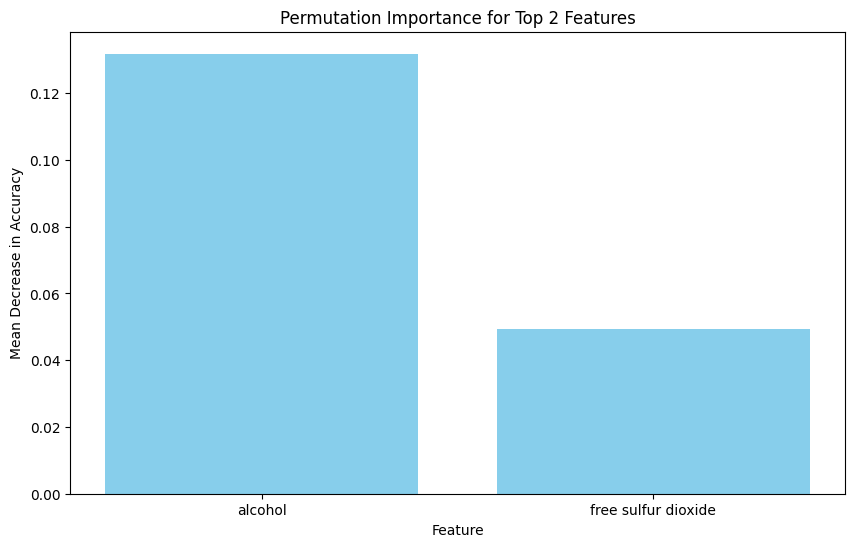

Top 2 features impacting the model's decision boundary:
alcohol: Mean Decrease in Accuracy = 0.1318
free sulfur dioxide: Mean Decrease in Accuracy = 0.0493


In [3]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# perform Permutation Importance on the trained decision tree
perm_importance = permutation_importance(clf_default, X_test, y_test, n_repeats=10, random_state=42)

# extract feature importance scores
feature_names = X.columns
importances = perm_importance.importances_mean
sorted_indices = np.argsort(importances)[::-1]

# plot the top two most impactful features
top_features = sorted_indices[:2]

plt.figure(figsize=(10, 6))
plt.bar(feature_names[top_features], importances[top_features], color='skyblue')
plt.title("Permutation Importance for Top 2 Features")
plt.ylabel("Mean Decrease in Accuracy")
plt.xlabel("Feature")
plt.show()

# print the impact of the top two features
print("Top 2 features impacting the model's decision boundary:")
for idx in top_features:
    print(f"{feature_names[idx]}: Mean Decrease in Accuracy = {importances[idx]:.4f}")


The sensitivity analysis results highlight the significant impact of the features "alcohol" and "free sulfur dioxide" on the Decision Tree Classifier's decision boundary for predicting wine quality. Among these, "alcohol" has the highest influence, as evidenced by its substantial mean decrease in accuracy when its values are permuted. This indicates that alcohol content plays a crucial role in determining whether a wine is classified as high or low quality. Conversely, "free sulfur dioxide" shows a lower, yet still notable, impact, suggesting its contribution is less critical but still relevant. The significane of "alcohol" aligns with its well-known association with wine quality, as higher alcohol content often correlates with higher quality ratings in wines.

Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.
• Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).
• Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).
• Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?


In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold

# initialize models
bagging_model = RandomForestClassifier(random_state=42, n_estimators=100)
boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# metrics dictionary
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "f1_score": f1_score,
}

# stratified k-fold cross-validation
folds = [5, 10, 15]
results = {"Bagging": {}, "Boosting": {}}

for fold in folds:
    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)

    for name, model in [("Bagging", bagging_model), ("Boosting", boosting_model)]:
        fold_metrics = {metric: [] for metric in metrics.keys()}

        for train_index, test_index in skf.split(X_train, y_train):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            # train model
            model.fit(X_train_fold, y_train_fold)

            # predict and calculate metrics
            y_pred = model.predict(X_test_fold)
            for metric, func in metrics.items():
                fold_metrics[metric].append(func(y_test_fold, y_pred))

        # average metrics across folds
        results[name][fold] = {metric: sum(scores) / len(scores) for metric, scores in fold_metrics.items()}

# print results
for name, res in results.items():
    print(f"Results for {name} model:")
    for fold, metrics in res.items():
        print(f"  {fold}-fold CV:")
        for metric, value in metrics.items():
            print(f"    {metric}: {value:.4f}")


Results for Bagging model:
  5-fold CV:
    accuracy: 0.8673
    precision: 0.7770
    f1_score: 0.6394
  10-fold CV:
    accuracy: 0.8714
    precision: 0.7952
    f1_score: 0.6486
  15-fold CV:
    accuracy: 0.8726
    precision: 0.7971
    f1_score: 0.6530
Results for Boosting model:
  5-fold CV:
    accuracy: 0.8239
    precision: 0.6483
    f1_score: 0.5031
  10-fold CV:
    accuracy: 0.8282
    precision: 0.6663
    f1_score: 0.5139
  15-fold CV:
    accuracy: 0.8323
    precision: 0.6844
    f1_score: 0.5244


The results show distinct performance patterns for the Bagging and Boosting models under the chosen metrics: accuracy, precision, and F1-score. The Bagging model consistently outperforms the Boosting model across all metrics and fold sizes, with particularly strong performance in accuracy and precision. This aligns with Bagging's ability to reduce variance by aggregating predictions from multiple independent models, resulting in stable and accurate predictions, especially for well-separated classes. In contrast, the Boosting model focuses on reducing bias by sequentially improving its predictions for harder-to-classify samples. This emphasis on challenging cases leads to relatively lower accuracy and F1-scores compared to Bagging, though its precision improves as the number of folds increases. The performance ranking remains consistent across metrics, with Bagging performing better overall. This consistency suggests that Bagging's focus on variance reduction and balanced class coverage makes it more robust for this dataset.

Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze
the results using the following:
• A confusion matrix for one selected test fold.
• A statistical test (e.g., paired t-test) to determine if differences between models are
significant.
• A discussion on the trade-off between bias and variance for each model.

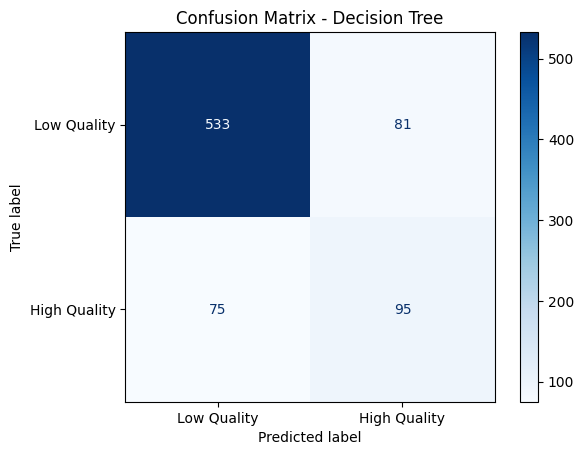

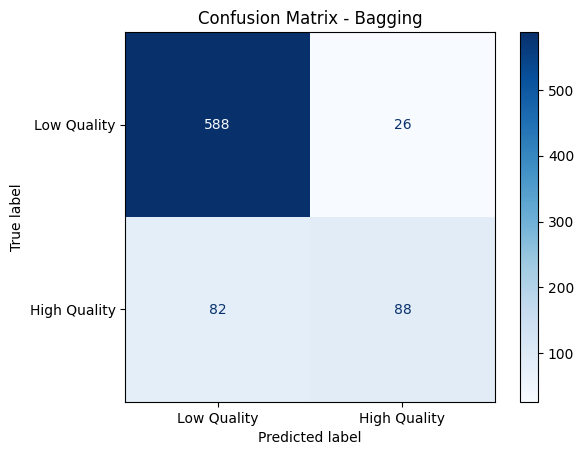

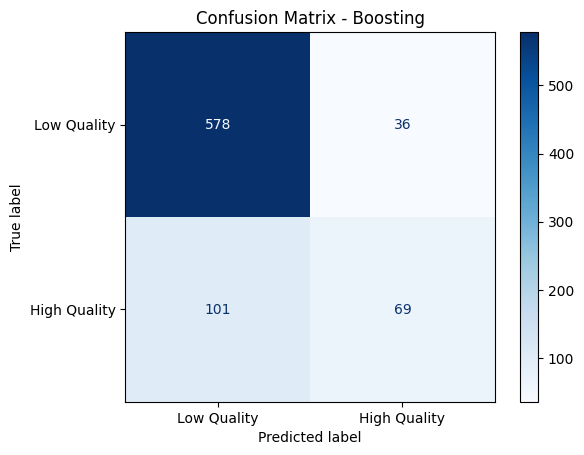

In [5]:
# confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_index, test_index = next(skf.split(X_train, y_train))
X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

# train all models on this fold
clf_default.fit(X_train_fold, y_train_fold)
bagging_model.fit(X_train_fold, y_train_fold)
boosting_model.fit(X_train_fold, y_train_fold)

y_pred_dt = clf_default.predict(X_test_fold)
y_pred_bagging = bagging_model.predict(X_test_fold)
y_pred_boosting = boosting_model.predict(X_test_fold)

# confusion Matrices
models = {
    "Decision Tree": y_pred_dt,
    "Bagging": y_pred_bagging,
    "Boosting": y_pred_boosting
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test_fold, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Quality", "High Quality"])
    display.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


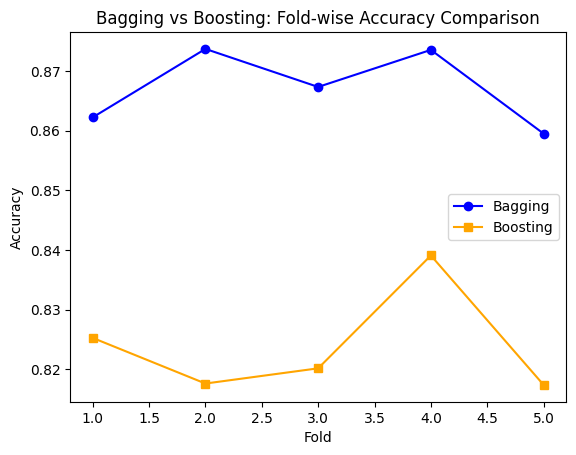

Bagging Model - Fold-wise Accuracy: [0.8622448979591837, 0.8737244897959183, 0.8673469387755102, 0.8735632183908046, 0.859514687100894]
Boosting Model - Fold-wise Accuracy: [0.8252551020408163, 0.8176020408163265, 0.8201530612244898, 0.8390804597701149, 0.8173690932311622]
Bagging Model - Mean Accuracy: 0.8672788464044622
Boosting Model - Mean Accuracy: 0.823891951416582

Paired t-test Results:
T-statistic: 11.2318
P-value: 0.0004
The difference between Bagging and Boosting models is statistically significant.


In [9]:
# paired t-tests

bagging_fold_scores = []
boosting_fold_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_train, y_train):

    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # train and evaluate Bagging
    bagging_model.fit(X_train_fold, y_train_fold)
    y_pred_bagging = bagging_model.predict(X_test_fold)
    bagging_fold_scores.append(accuracy_score(y_test_fold, y_pred_bagging))

    # train and evaluate Boosting
    boosting_model.fit(X_train_fold, y_train_fold)
    y_pred_boosting = boosting_model.predict(X_test_fold)

    boosting_fold_scores.append(accuracy_score(y_test_fold, y_pred_boosting))

folds = range(1, len(bagging_fold_scores) + 1)
plt.plot(folds, bagging_fold_scores, label="Bagging", marker="o", color="blue")
plt.plot(folds, boosting_fold_scores, label="Boosting", marker="s", color="orange")

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Bagging vs Boosting: Fold-wise Accuracy Comparison")
plt.legend()
plt.show()

import numpy as np
print("Bagging Model - Fold-wise Accuracy:", bagging_fold_scores)
print("Boosting Model - Fold-wise Accuracy:", boosting_fold_scores)
print("Bagging Model - Mean Accuracy:", np.mean(bagging_fold_scores))
print("Boosting Model - Mean Accuracy:", np.mean(boosting_fold_scores))

from scipy.stats import ttest_rel

# perform paired t-test
t_stat, p_value = ttest_rel(bagging_fold_scores, boosting_fold_scores)

print("\nPaired t-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference between Bagging and Boosting models is statistically significant.")
else:
    print("The difference between Bagging and Boosting models is not statistically significant.")




The confusion matrices and accuracy comparison for Decision Tree, Bagging, and Boosting models highlight their varying effectiveness and trade-offs. The Decision Tree model achieves a balance between precision and recall but exhibits some overfitting tendencies, as seen in its relatively higher misclassification of high-quality wines (75 false negatives). Bagging, which collects results from multiple decision trees, demonstrates the best overall performance. It has fewer false positives (26) and a moderate number of false negatives (82), indicating its strength in reducing variance and maintaining robustness. Boosting, while focusing on reducing bias by correcting errors sequentially, struggles with false negatives (101), likely due to its aggressive optimization. This leads to lower recall for the high-quality class.

From the fold-wise accuracy comparison, Bagging consistently outperforms Boosting across all folds, achieving a mean accuracy of 86.73% compared to Boosting's 82.39%. The stability of Bagging is evident in its narrower range of accuracy across folds, while Boosting shows greater variability. This aligns with Bagging's ability to generalize well by averaging predictions, whereas Boosting may overfit to specific folds due to its iterative refinement. These results suggest that Bagging is better suited for this dataset due to its resilience against overfitting and consistent performance, whereas Boosting might need additional parameter tuning to handle the class imbalance more effectively.

The paired t-test results indicate a statistically significant difference between the performance of the Bagging and Boosting models, as shown by a t-statistic of 11.23 and a p-value of 0.0004, which is well below the significance threshold of 0.05. This suggests that the differences in fold-wise accuracy scores are unlikely to have occurred by chance. The consistently higher accuracy of the Bagging model, combined with the low p-value, confirms that Bagging significantly outperforms Boosting for this classification task. This aligns with Bagging's ability to reduce variance and provide stable predictions by averaging outputs from multiple independent models. Conversely, Boosting, which sequentially improves predictions by focusing on harder-to-classify samples, appears less effective for this dataset, potentially due to class imbalance or overfitting tendencies. These results emphasize the superiority of Bagging in achieving robust and consistent performance on this specific task.